In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(n_samples=1000,
                  random_state=365,
                  centers=[(-3,3), (0,0), (2,2)])
x.shape, y.shape

((1000, 2), (1000,))

In [3]:
data = pd.DataFrame(data=x, columns=['feature 1', 'feature 2'])
data['target'] = y

In [4]:
data.head()

feature 1  feature 2  target
0   1.630460   2.094029       2
1  -2.811252   3.852241       0
2   0.501051   1.582531       2
3  -3.624112   3.325318       0
4  -3.278106   2.359416       0

In [5]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

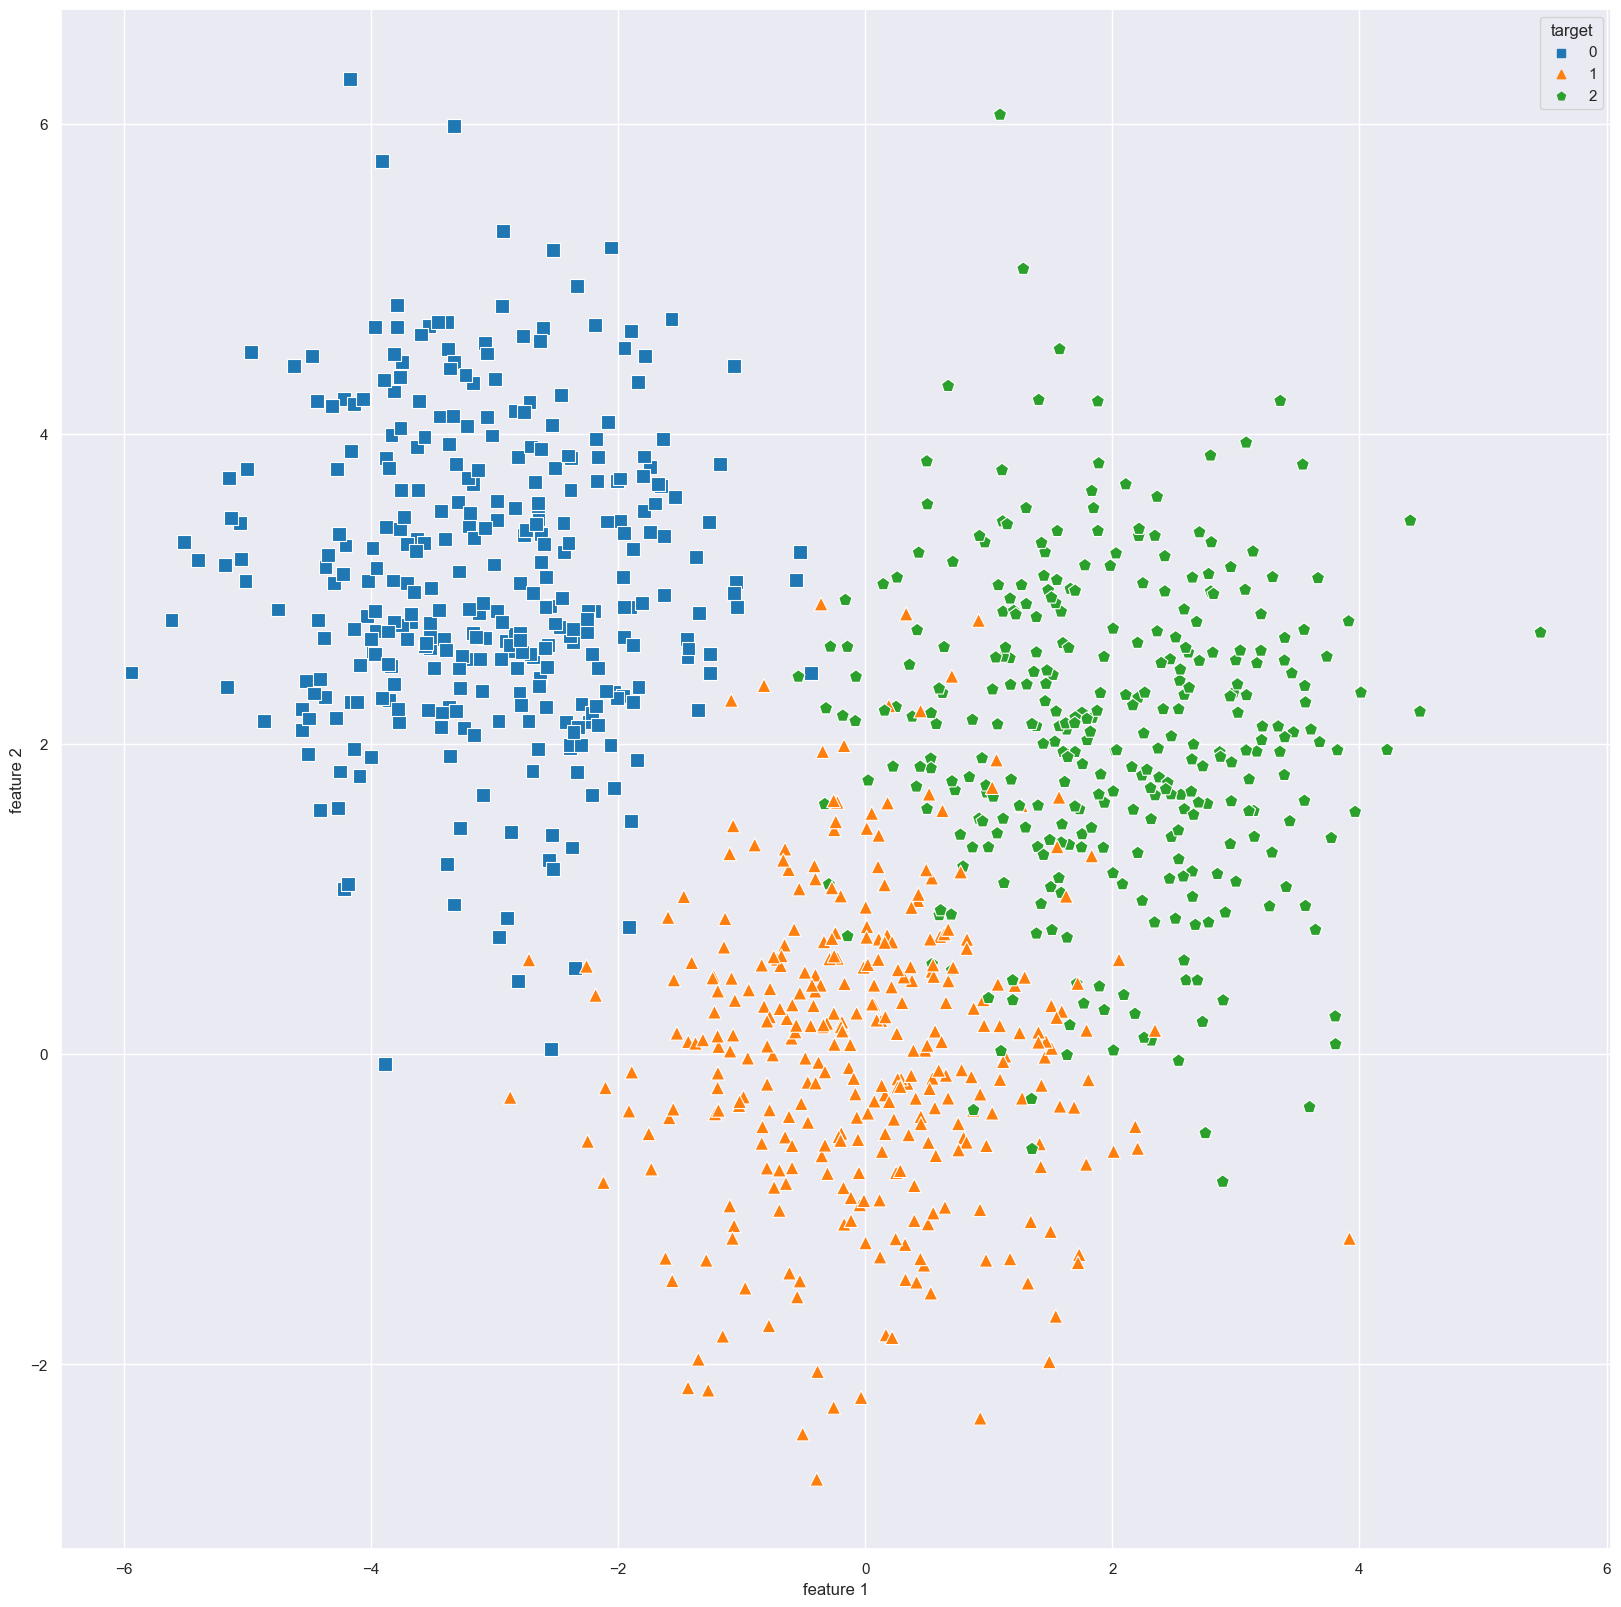

In [6]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=data,
                x='feature 1',
                y='feature 2',
                hue='target',
                palette='tab10',
                markers=[',', '^', 'p'],
                style='target',
                s=100);

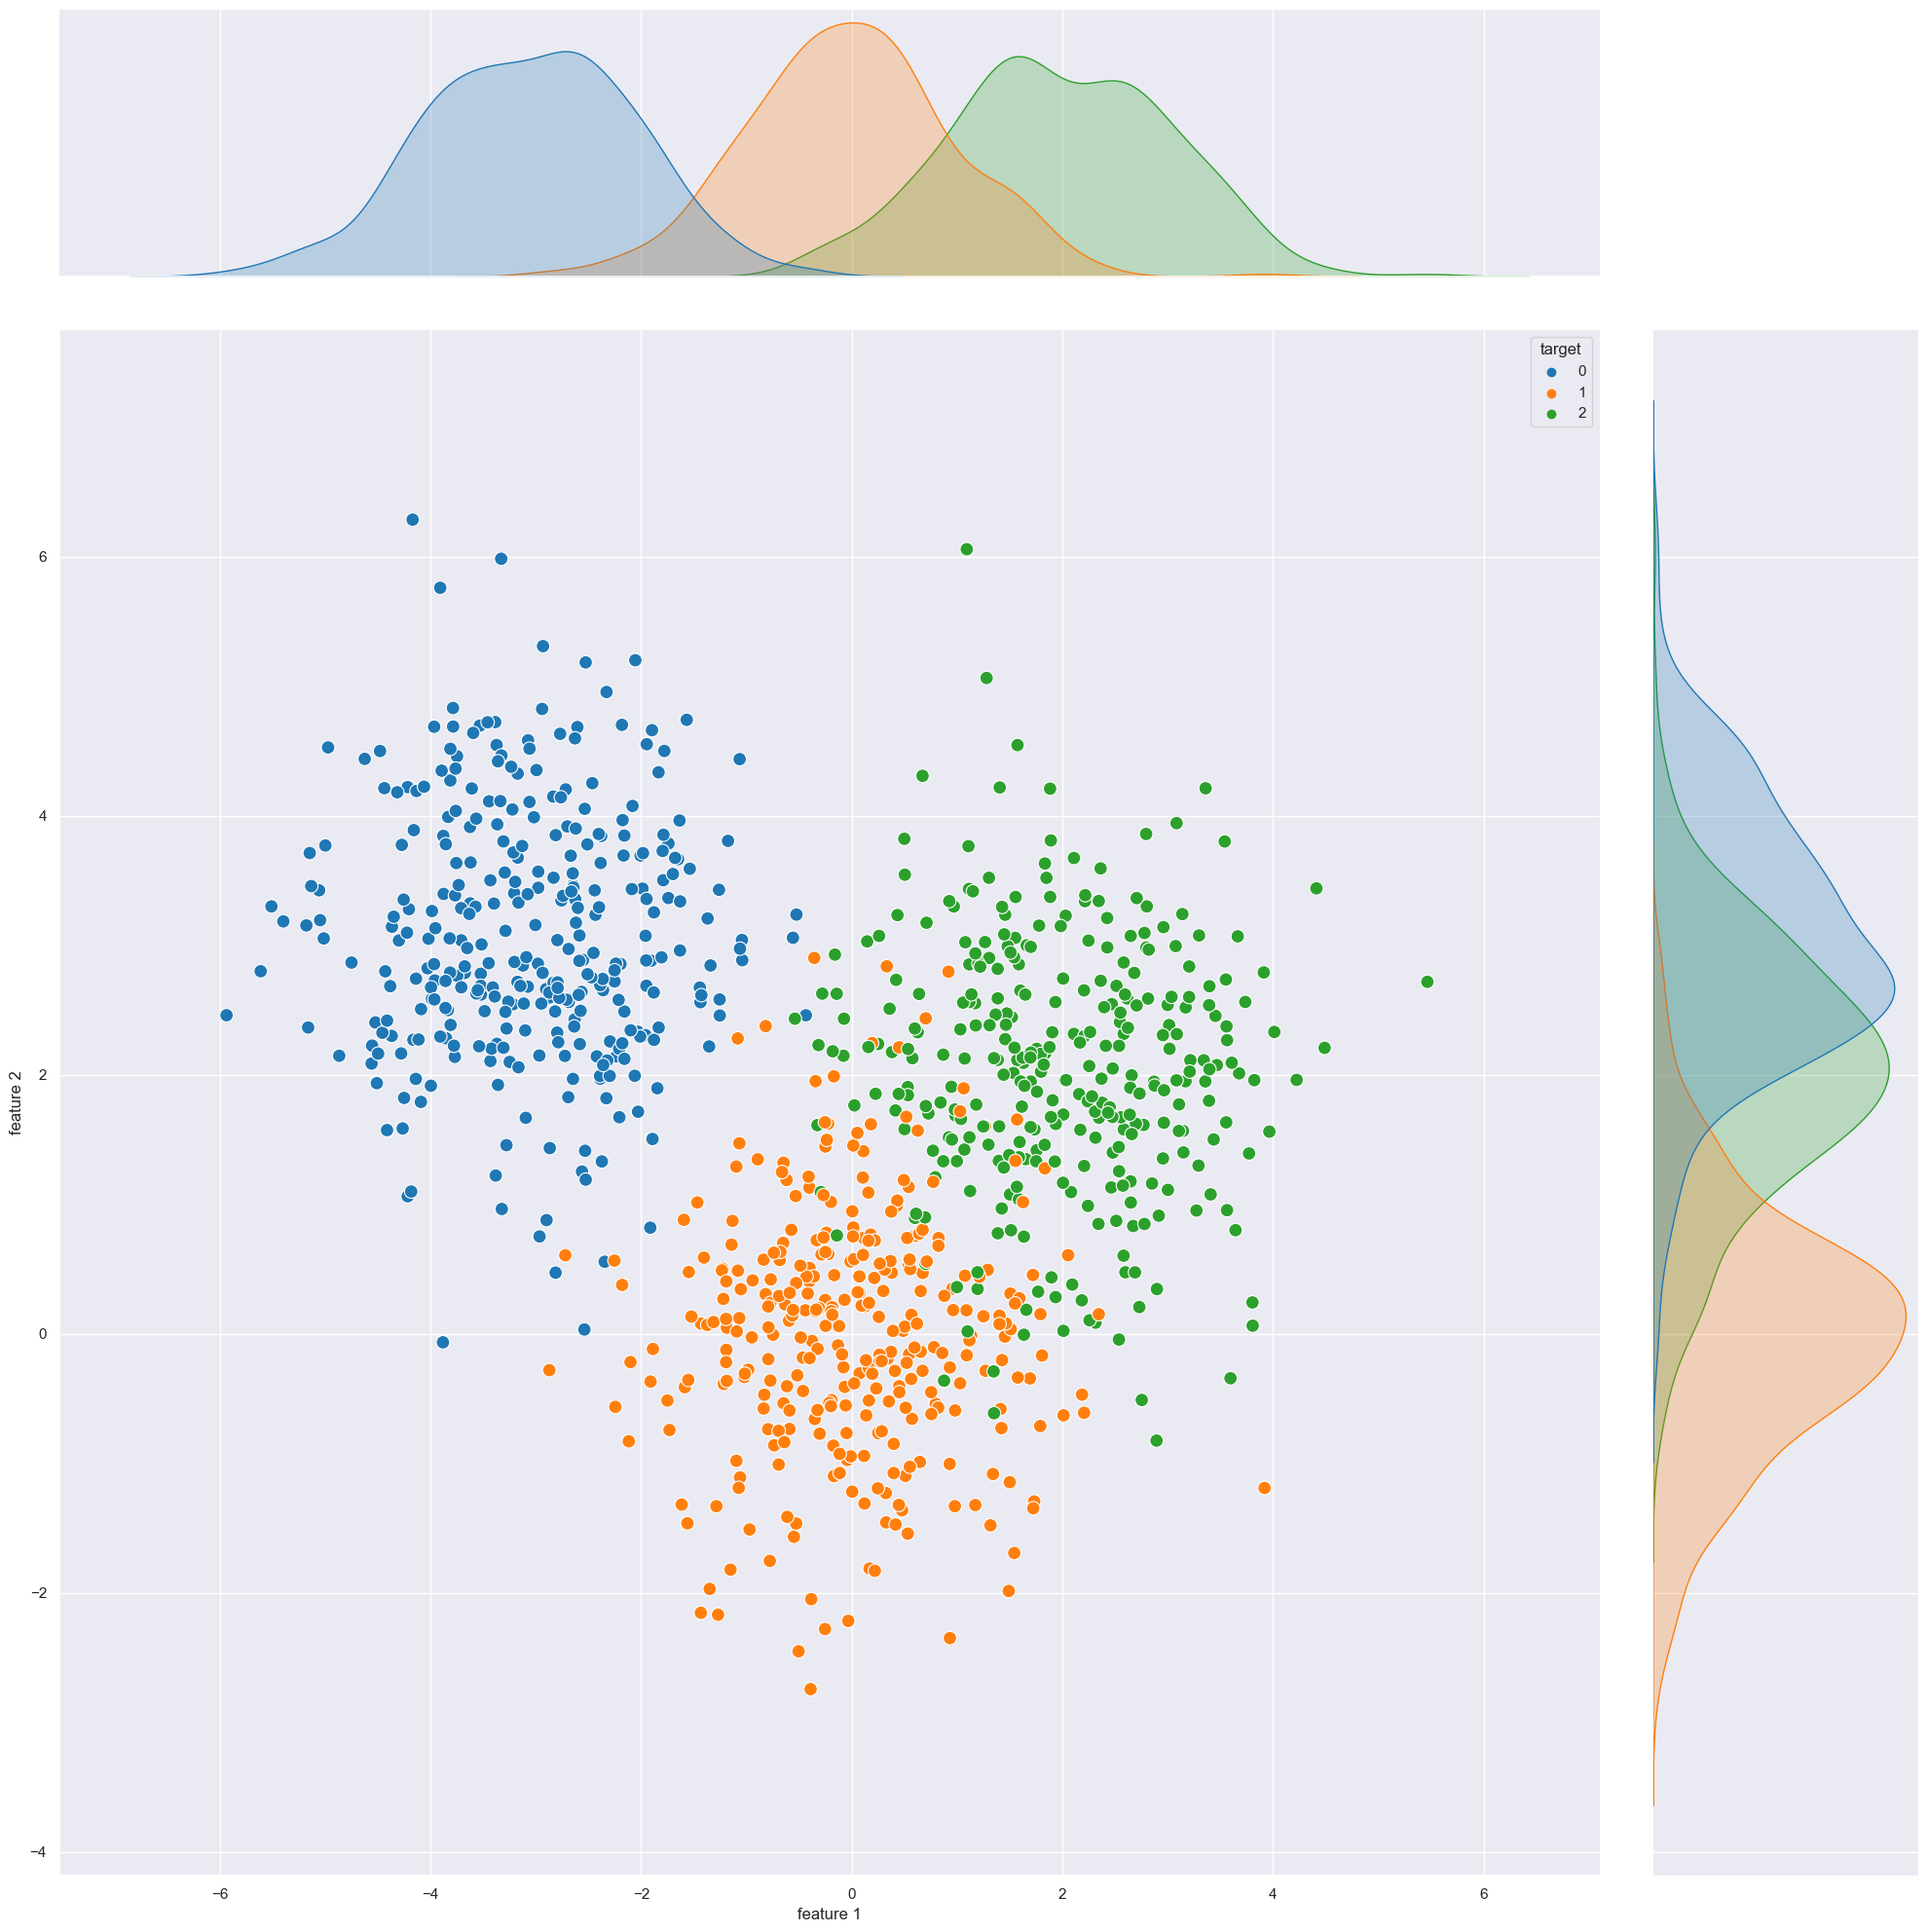

In [7]:
sns.jointplot(data=data,
             x='feature 1',
             y='feature 2',
             hue='target',
             palette='tab10',
             height=20,
             s=100,
             legend=True);

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    stratify=y, 
                                                    random_state=365)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30, weights='distance')

In [10]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [11]:
feature_1 = -0.18
feature_2 = 3.2
knn.predict([[feature_1, feature_2]])

array([2])

In [12]:
neighbor = knn.kneighbors([[feature_1, feature_2]])
neighbor

(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811]]),
 array([[336, 215, 679, 221, 690, 688, 269, 309, 543, 100,  79, 161, 708,
         613, 216, 291, 561, 748, 516, 140, 514, 399,  25, 255, 431,   0,
         386, 458,   3, 304]], dtype=int64))

In [13]:
x_train_viz = pd.DataFrame(data=x_train, columns=['feature 1', 'feature 2'] )

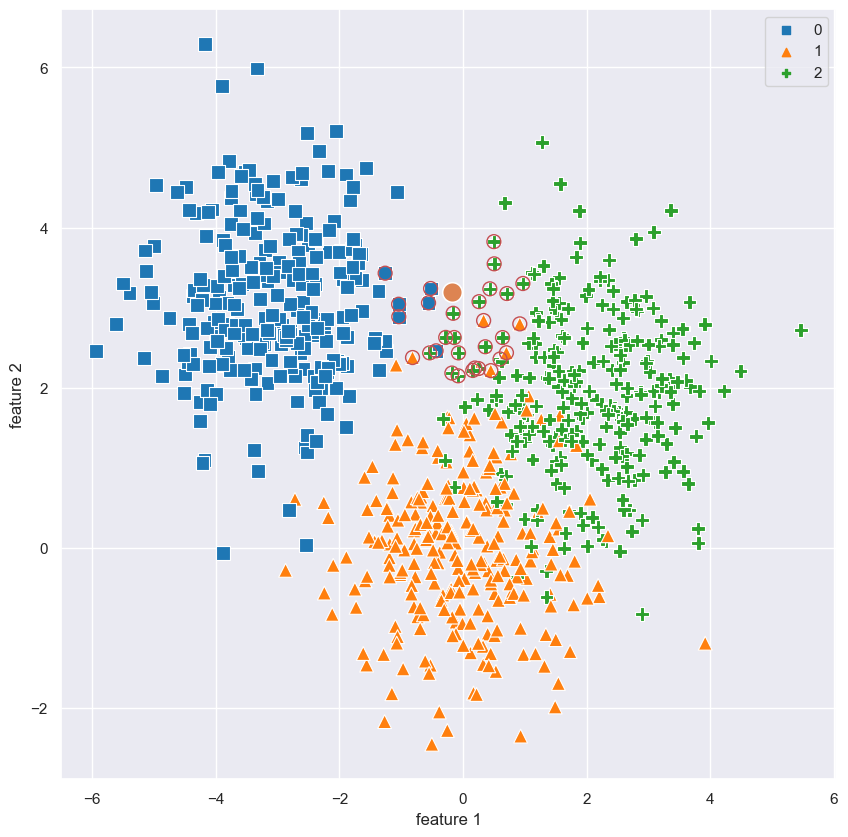

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='feature 1',
                y='feature 2',
                data=x_train_viz,
                hue=y_train,
                palette='tab10',
                markers=[',', '^','P'],
                style=y_train,
                s=100,
                legend=True)

sns.scatterplot(x=feature_1, y=feature_2,
                markers=['o'],
                style=[feature_2],
                s=200, 
                legend=False);

plot_x_train = []
plot_y_train = []

for i in neighbor[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])
    
plt.scatter(plot_x_train, plot_y_train, s=100, facecolors='none', edgecolors='r');

In [15]:
import time
from mlxtend.plotting import plot_decision_regions

time elapse: 15 second


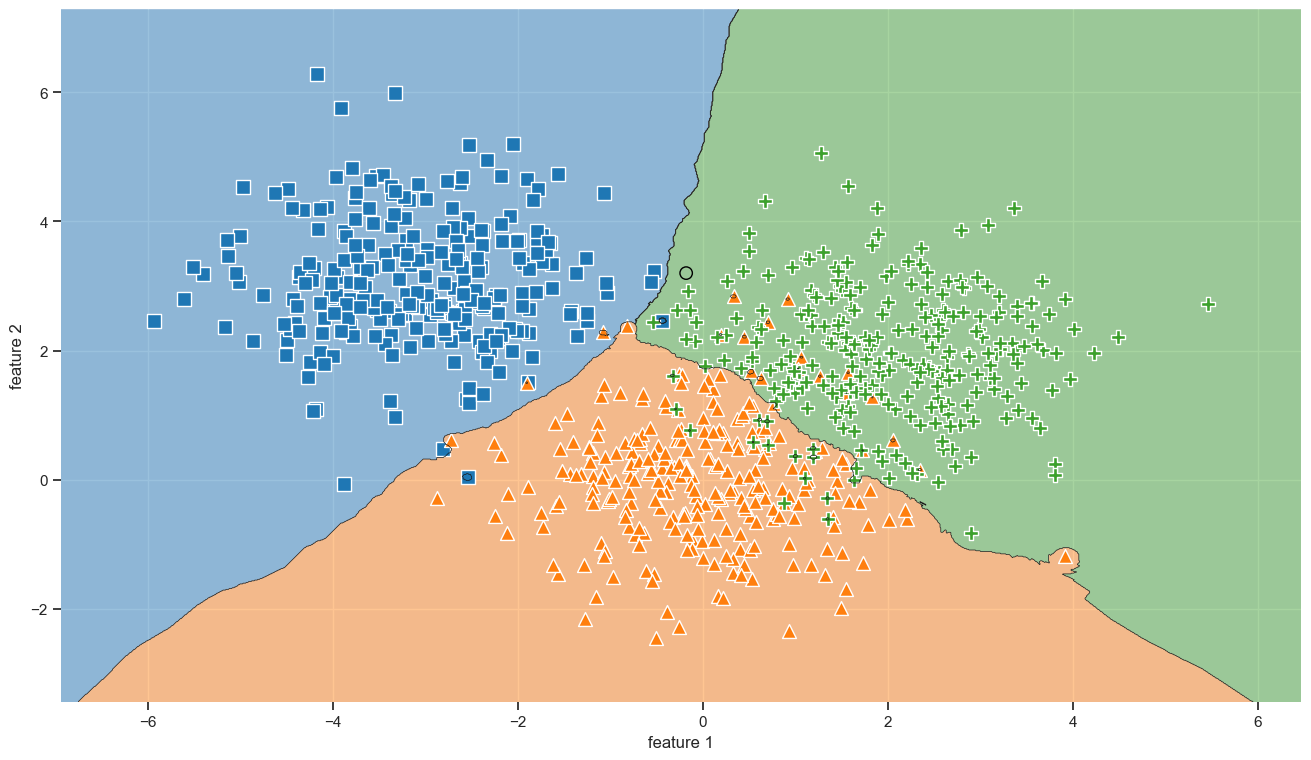

In [16]:
start = time.time()

plt.figure(figsize=(16,9))

plot_decision_regions(X=x_train, y=y_train, 
                      X_highlight=np.array([[feature_1, feature_2]]),
                      clf=knn, 
                      markers=[',','^','P'], 
                      scatter_kwargs={'s':100, 'edgecolor':'white', 'alpha':1},
                      legend=0)

plt.xlabel('feature 1')
plt.ylabel('feature 2')

end = time.time()

print(f'time elapse: {round(end-start)} second')

In [17]:
from sklearn.metrics import accuracy_score

error_uniform = []
error_distance = []

k_range = range(1, 51)
for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, prediction))
    
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, prediction))

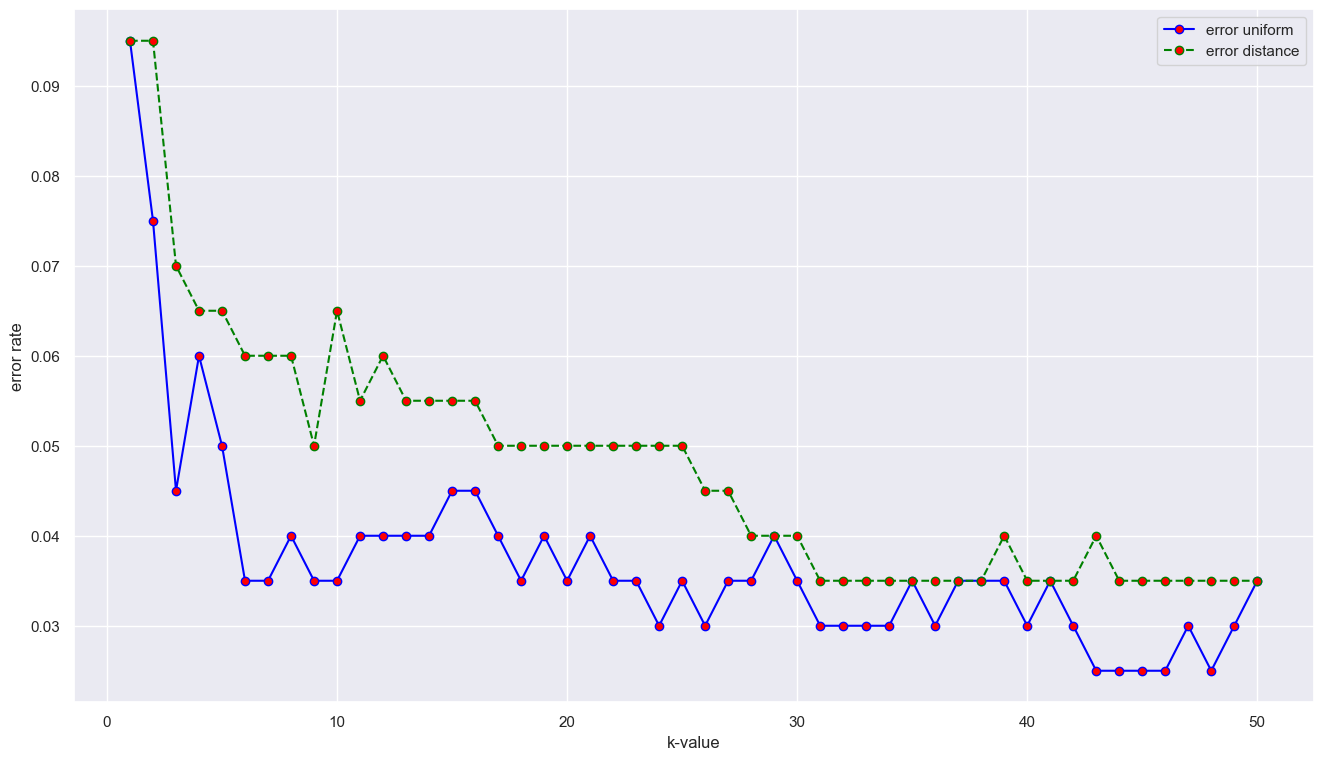

In [18]:
plt.figure(figsize=(16, 9))
plt.plot(k_range, error_uniform, c='blue', linestyle='solid',
         marker='o', markerfacecolor='red',label='error uniform')
plt.plot(k_range, error_distance, c='green', linestyle='dashed',
         marker='o', markerfacecolor='red',label='error distance')
plt.legend()
plt.xlabel('k-value')
plt.ylabel('error rate')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}

In [20]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=parameter,
                           scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [21]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 10, 'weights': 'uniform'}
0.9512499999999999


In [22]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
y_pred = clf.predict(x_test)

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

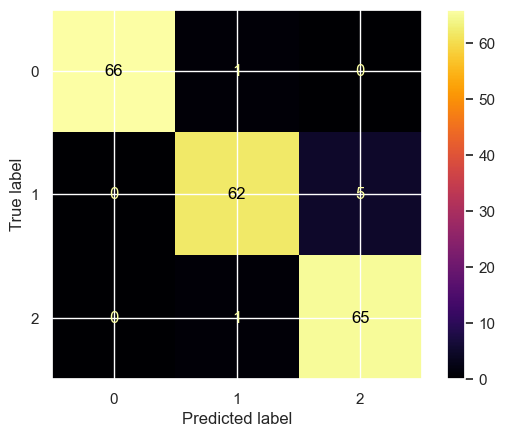

In [25]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_pred, 
                                        labels=clf.classes_, 
                                        cmap='inferno');

In [27]:
print(classification_report(y_true=y_test,
                            y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

